<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

pandas has built-in methods that create visualizations of Series and DataFrame objects.

<b> seaborn </b> is a library developed by Michael Watson for creating common visualizations of statistics.

# Line Plots

## Series

Series and DataFrames both have a plot attribute used for making basic plot types. By default, '.plot()' makes line plots.

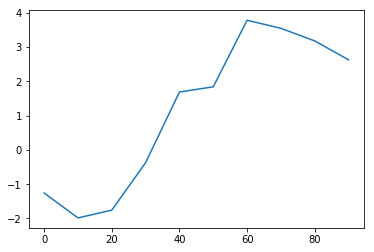

In [3]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

The indices are passed to the x-axis (can disable this using 'use_index=False') and the values are used as the y values.

There are many arguments we can pass into Series.plot() and these are summarized in the table on page 272 on the textbook. These methods include adjusting things like the xtickvalues, the xlim and ylim values, and much more.

## DataFrame

By default a dataframe will plot each one of its columns as a seperate line.

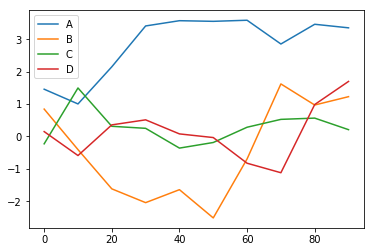

In [4]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A','B','C','D'],
                  index=np.arange(0,100,10))
df.plot()

The plot attribute contains a <i>family</i> of methods for different plotting types. For example, df.plot() is equivalent to df.plot.line()

## Plotting on a Matplotlib Object

Suppose we have a figure and axis already created. We can plot the series/dataframe on a specific axis by using the ax argument.

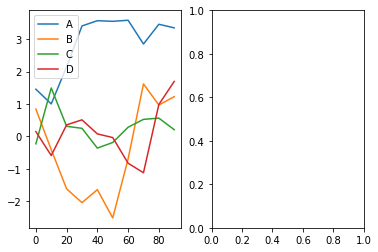

In [5]:
fig, axes = plt.subplots(1,2)
df.plot(ax=axes[0])

# Bar Plots

## Basics

plot.bar() and plot.barh() make vertical and horizontal bar plots respectively. In this case, the series/dataframe index will be used as the x value and the data will be used as the y value.

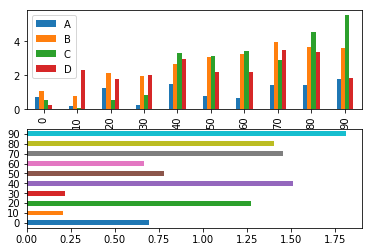

In [6]:
fig, axes = plt.subplots(2,1)

df = pd.DataFrame(abs(np.random.randn(10, 4).cumsum(0)),
                 columns=['A','B','C','D'],
                  index=np.arange(0,100,10))
df.plot.bar(ax=axes[0])
df['A'].plot.barh(ax=axes[1])

We can also use stacked bar plots with dataframes combining all the seperate bars into one bar:

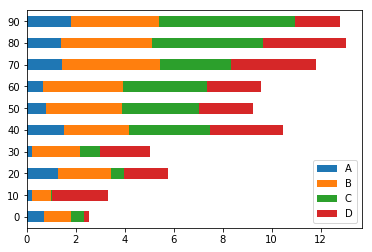

In [7]:
fig, ax = plt.subplots(1,1)

df.plot.barh(ax=ax, stacked=True)

# Using Seaborn For Plotting

## A Quick Bar Plot Example

Consider the following data set containing information about how people tip at restaurants.

In [8]:
tips = pd.read_csv('sampledata/tips.txt')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Let's look at tipping percentage using seaborn. The seaborn package is particularily useful for data aggregration when plotting. In the following example, we make a bar plot of tip percentage on a given day.

In this example <b> x is tip percentage </b> and <b> y is the day of the week. </b> The bar plot is <b> set to horizontal </b> so for each day, the average tip on a given day is automatically calculated. 

The <b> error bars </b> are automatically added as well; they represent the 95% confidence interval when calculating the average.

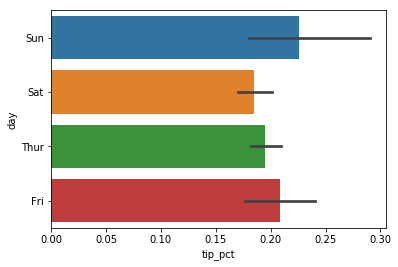

In [9]:
import seaborn as sns

tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting functions in seaborn take in a data argument (which can be a pandas array) and the other arguments refer to column names.

seaborn.barplot has a hue option which allows one to make an additional split by another categorical value.

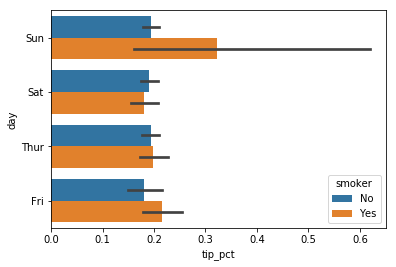

In [10]:
sns.barplot(x='tip_pct', y='day', hue='smoker', data=tips, orient='h')

## Changing the Seaborn plot style

seaborn has a variety of plotting styles; we can edit this using commands such us

In [11]:
sns.set(style="whitegrid")

# Histograms and Density Plots

## Histograms

A histogram gives a discretized display of value frequency. The data points are seperated into equal sized and evenly spaced bins. Lets look at an example of a matplotlib histogram.

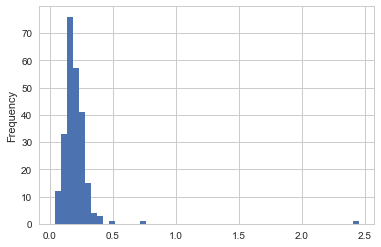

In [12]:
tips = pd.read_csv('sampledata/tips.txt')
tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])

tips['tip_pct'].plot.hist(bins=50)

## Density Plots

Density plots are formed by computing an estimate of what continuous probablity density function would have yielded the data observed. The usual procedure is to estimate the distribution as a mixture of 'kernels' (simpler distributions like the normal distribution).

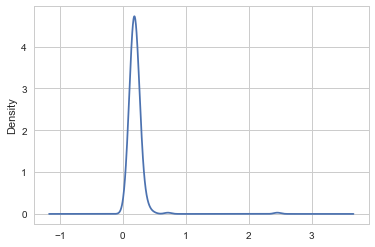

In [13]:
tips['tip_pct'].plot.density()

## Histograms and Density Plots with Seaborn

seaborn has methods for plotting both histograms and density plots simultaneously.

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


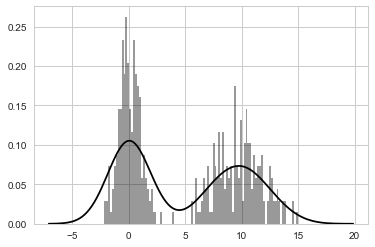

In [14]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

fig, ax = plt.subplots()
sns.distplot(values, ax=ax,  bins=100, color='k')

With seaborn, we can also enforce a certain type of fit on a curve. We can enforce a single normal distribution function if we like (although in this example it does not provide a very good fit)

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


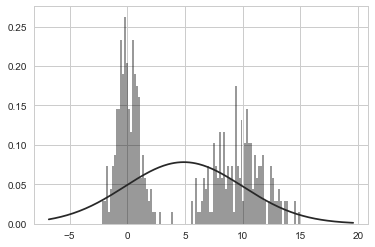

In [15]:
from scipy.stats import norm

fig, ax = plt.subplots()
sns.distplot(values, ax=ax, fit=norm, kde=False, bins=100, color='k')

The fit method is exactly the same in scipy.stats, so if we want the parameters we can retrieve them like such:

In [16]:
(mu, sigma) = norm.fit(values)
mu, sigma

(4.901513904718264, 5.104141381847803)

# Scatter/Point Plots

## Plotting

Scatter plots are a simple version of a two dimensional histogram and are useful for comparing two one dimesional data sets.

In [17]:
data = pd.read_csv('sampledata/macrodata.txt')
data = data[['cpi', 'm1', 'tbilrate', 'unemp']]

Lets take the logarithm of the data and compare the differences.

In [18]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


We can use seaborns regression plot to make a scatter plot and draw a linear regression line:

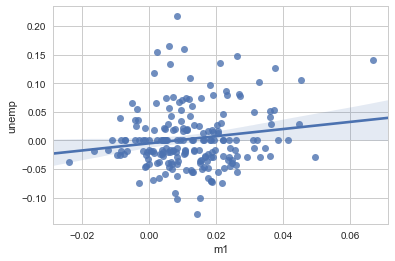

In [19]:
sns.regplot('m1', 'unemp', data=trans_data)

In exploratory data analysis it is often useful to look at <b> all </b> the scatter plots among a group of variables. We can create an array of such plots (using seaborn) as follows:

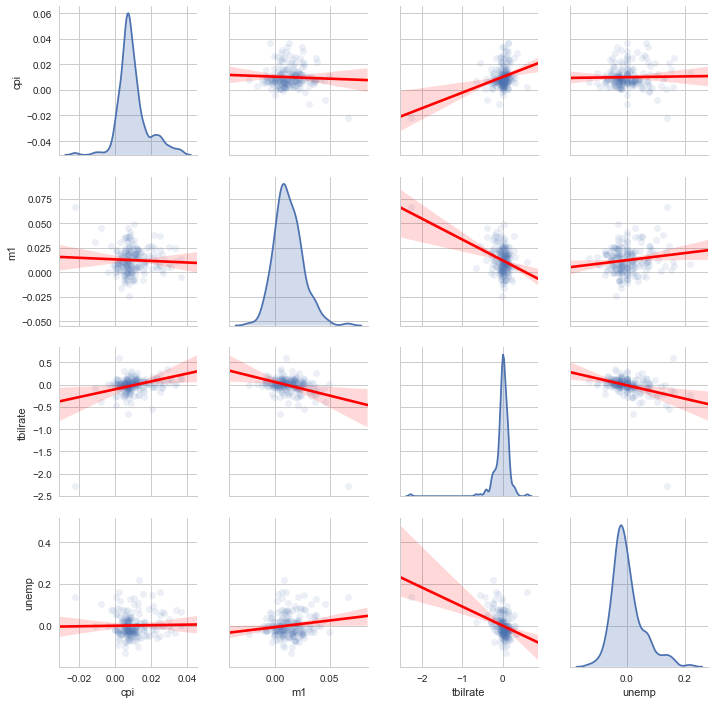

In [20]:
x = sns.pairplot(trans_data, kind="reg", diag_kind='kde', plot_kws={'line_kws':{'color':'r'}, 'scatter_kws':{'alpha':0.1}},
            diag_kws={'shade':True})
x

<b> trans_data: </b> The dataframe used for plotting

<b> kind </b>: Determines the kind of plot for the non-diagonal plots.

<b> diag_kind: </b> Determines how the diagonal plots are shown. Instead of histograms (the default argument), we decide to use a density function.

<b> plot_kws: </b> Keywords for the non-diagonal plots. We have nested dictionaries since we have properties for both the scatter portion of the plots and the regression line portion of the plots.

<b> diag_kws: </b> These are the keyword arguments for the plots on the diagonal.

## Limitations of Seaborn

Seaborn doesn't actually let you extract the statistical parameters of the regression line used for fitting. For this reason, it is not the most exceptional program for statistics; rather, it should be used for rough estimations and initial examinations of data.

# Facet Grids and Categorical Data

## Facet Grids

Often in large data sets we have multiple grouping dimensions. Facet grids are a way of displaying the connection between many different catagories of data.

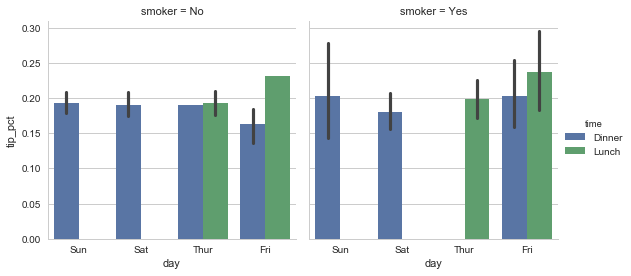

In [21]:
tips = pd.read_csv('sampledata/tips.txt')
tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])

sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct<1])

Instead of grouping time by colours within a single plot, we can instead choose to add another row (top row of plots for dinner, bottom row for lunch). The only argument is we set row='time' instead of hue='time':

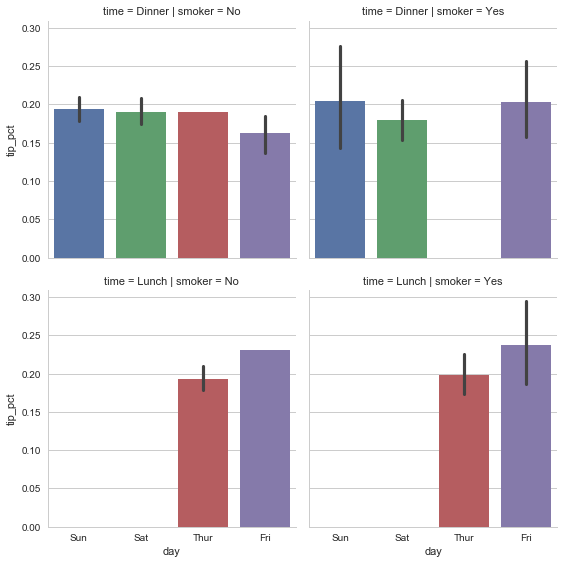

In [22]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct<1])

## Box Plots

Box plots are often extremely useful as they show the mean, quartiles, and outliers.

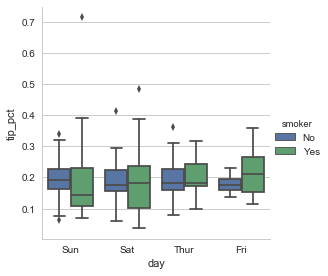

In [23]:
sns.factorplot(x='day', y='tip_pct', kind='box', hue='smoker', data=tips[tips.tip_pct<1])